In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [78]:
# File 1 (7,429 entries)
#Museums by Discipline ART, BOT, CMU, HST, NAT, SCI, and ZAW
f1 = pd.read_csv('MuseumFile2018_File1_Nulls.csv', encoding = "ISO-8859-1")
print(f1.shape)
print(f1.columns.get_values())

(7431, 57)
['MID' 'DISCIPL' 'EIN' 'CO_LOC_RES' 'NTEEC' 'DUNS' 'NAICS' 'COMMONNAME'
 'LEGALNAME' 'ALTNAME' 'AKADBA' 'ADSTREET' 'ADCITY' 'ADSTATE' 'ADZIP'
 'ADZIP5' 'PHSTREET' 'PHCITY' 'PHSTATE' 'PHZIP' 'PHZIP5' 'PHONE' 'WEBURL'
 'IRS_NAME15' 'TAXPER15' 'INCOMECD15' 'INCOME15' 'REVENUE15'
 'IRS_STREET15' 'IRS_CITY15' 'IRS_STATE15' 'IRS_ZIP15' 'RULEDATE15'
 'IPEDS' 'INSTNAME' 'INSTCITY' 'INSTST' 'LONGITUDE' 'LATITUDE' 'AAMREG'
 'BEAREG' 'LOCALE4' 'FIPSST' 'FIPSCO' 'GSTREET' 'GCITY' 'GSTATE' 'GZIP'
 'GZIP5' 'BMF15_F' 'IMLSAD_F' 'PFND_F' 'FCT3P_F' 'USER_F' 'UNI_F'
 'OTHER_F' 'SOURCE']


In [79]:
# File 2 (7,959 entries): General Museums and Related Organizations GMU (i.e., general museums)
f2 = pd.read_csv('MuseumFile2018_File2_Nulls.csv', encoding = "ISO-8859-1")
print(f2.shape)

(7961, 58)


In [38]:
# File 3 (14,783 entries): Historical Societies/Historic Preservation HSC
f3 = pd.read_csv('MuseumFile2018_File3_Nulls.csv', encoding = "ISO-8859-1")
print(f3.shape)
# has extra empty row (row 0)
f3.drop(0, inplace=True)
print(f3.shape)

(14786, 58)
(14785, 58)


Text(0.5, 1.0, 'Museum Survey Disciplines')

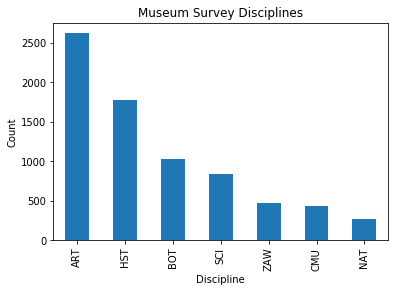

In [80]:
fig1 = f1['DISCIPL'].value_counts().plot(kind="bar")
fig1.set_xlabel("Discipline")
fig1.set_ylabel("Count")
fig1.set_title("Museum Survey Disciplines")

      5366
CA     168
TX     152
NY     141
FL      99
PA      80
IL      68
MI      68
OH      67
VA      64
NC      61
MA      52
WA      51
WI      51
CO      45
MD      43
IN      42
NJ      41
MN      40
TN      38
AL      36
LA      35
OR      34
CT      33
GA      33
KS      31
MO      31
SC      30
KY      29
ME      26
MT      25
HI      25
NM      24
AZ      24
NE      22
IA      22
UT      22
AK      20
OK      20
AR      19
WY      19
DC      19
MS      17
WV      15
RI      13
ID      12
NV      12
VT      12
NH      11
DE       9
ND       7
SD       7
Name: PHSTATE, dtype: int64


Text(0.5, 1.0, 'Museum Survey States Distribution')

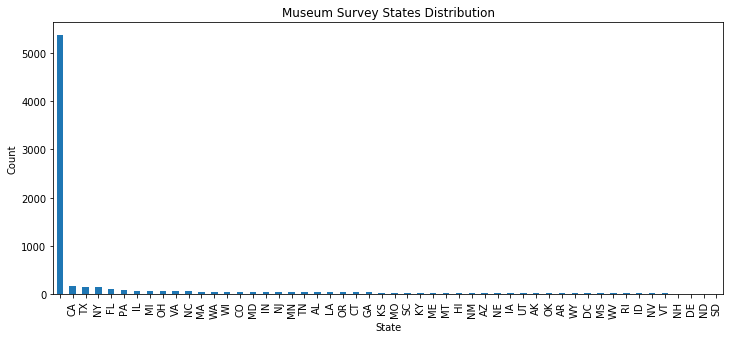

In [86]:
# Check state distribution of museums
print(f1['PHSTATE'].value_counts())
fig2 = f1['PHSTATE'].value_counts().plot(kind="bar", figsize = (12,5))
fig2.set_xlabel("State")
fig2.set_ylabel("Count")
fig2.set_title("Museum Survey States Distribution")


In [108]:
#print(f1['PHSTATE'].head())
#print(f1['PHZIP'].head())
print(f1.columns.get_values())
#print(f1['COMMONNAME'].head())
print(f1[['LEGALNAME','PHSTREET','PHCITY','PHSTATE','PHZIP','PHZIP5', 'INSTST','LONGITUDE','LATITUDE']].head())

['MID' 'DISCIPL' 'EIN' 'CO_LOC_RES' 'NTEEC' 'DUNS' 'NAICS' 'COMMONNAME'
 'LEGALNAME' 'ALTNAME' 'AKADBA' 'ADSTREET' 'ADCITY' 'ADSTATE' 'ADZIP'
 'ADZIP5' 'PHSTREET' 'PHCITY' 'PHSTATE' 'PHZIP' 'PHZIP5' 'PHONE' 'WEBURL'
 'IRS_NAME15' 'TAXPER15' 'INCOMECD15' 'INCOME15' 'REVENUE15'
 'IRS_STREET15' 'IRS_CITY15' 'IRS_STATE15' 'IRS_ZIP15' 'RULEDATE15'
 'IPEDS' 'INSTNAME' 'INSTCITY' 'INSTST' 'LONGITUDE' 'LATITUDE' 'AAMREG'
 'BEAREG' 'LOCALE4' 'FIPSST' 'FIPSCO' 'GSTREET' 'GCITY' 'GSTATE' 'GZIP'
 'GZIP5' 'BMF15_F' 'IMLSAD_F' 'PFND_F' 'FCT3P_F' 'USER_F' 'UNI_F'
 'OTHER_F' 'SOURCE']
                                    LEGALNAME          PHSTREET      PHCITY  \
0                THE MOBILE MUSEUM OF ART INC    4850 MUSEUM DR      MOBILE   
1  MONTGOMERY MUSEUM OF FINE ARTS ASSOCIATION  ONE MUSEUM DRIVE  MONTGOMERY   
2                   MOBILE MEDICAL MUSEUM INC                                 
3     JASMINE HILL GARDENS AND OUTDOOR MUSEUM                                 
4                     JAN DEM

In [116]:
f_check = f1[f1['PHSTATE'] == ' ']
print(f_check.shape)
#f_check[['LEGALNAME','PHSTREET','PHCITY','PHSTATE','PHZIP','PHZIP5', 'INSTST','LONGITUDE','LATITUDE']]

(5366, 57)


In [129]:
# Plan: use geocoding to apply and get missing latitude and longitude
api_key = ''
with open("geocoding_api_key.txt", 'r') as f:
    api_key = f.read()
    
f.close()
#print(api_key)